Okay let's add some new fields

In [19]:
#Importing Package
#importing
import numpy as np
import pandas as pd
from datetime import datetime, timedelta, timezone
import matplotlib.pyplot as plt
import os
print("all libraries are loaded!")

all libraries are loaded!


In [20]:
# Import the data (CLEANED)
folder_1 = 'pitt-DriverID' # Where the pre-processed datasets are located
example_person = "0221203f-75b0-4862-8fbd-3969a0ca7e85" # driver_id
filename = example_person+".csv"
df = pd.read_csv(folder_1 + '/' + filename)

# Sort by DateTime
df = df.sort_values(by='DateTime', ascending=True, na_position='first')

#Format  DateTime
df["DateTime"] = pd.to_datetime(df['DateTime'])

# Drop first column of dataframe
df = df.iloc[: , 1:]

#reset the index
df = df.reset_index(drop=True)

df.head()

,driver_id,shift_id,lat,lon,accuracy,speed,heading,activity_type,activity_confidence,DateTime
0,0221203f-75b0-4862-8fbd-3969a0ca7e85,179424.0,40.501158,-80.176138,6.0,6.82,261.09,in_vehicle,100,2019-03-15 12:18:53
1,0221203f-75b0-4862-8fbd-3969a0ca7e85,179424.0,40.501150,-80.176208,6.0,6.23,261.09,in_vehicle,100,2019-03-15 12:18:54
2,0221203f-75b0-4862-8fbd-3969a0ca7e85,179424.0,40.501201,-80.176369,6.0,6.43,262.53,in_vehicle,100,2019-03-15 12:18:56
3,0221203f-75b0-4862-8fbd-3969a0ca7e85,179424.0,40.501362,-80.179117,6.0,12.26,273.42,in_vehicle,100,2019-03-15 12:19:23
4,0221203f-75b0-4862-8fbd-3969a0ca7e85,179424.0,40.501355,-80.179584,6.0,13.15,266.04,in_vehicle,100,2019-03-15 12:19:26


In [21]:
# vectorized haversine function
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371*1000):
    """
    slightly modified version: of http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = map(np.radians,[lat1,lon1,lat2,lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [22]:
#make a list of date
date_list = df['DateTime'].dt.strftime('%Y-%m-%d')
date_list = date_list.unique()
date_list = date_list.tolist()
example_date = date_list[0]

#Filter DateTime
df = df[(df['DateTime'].dt.date.astype(str) == example_date)]

df.head()

,driver_id,shift_id,lat,lon,accuracy,speed,heading,activity_type,activity_confidence,DateTime
0,0221203f-75b0-4862-8fbd-3969a0ca7e85,179424.0,40.501158,-80.176138,6.0,6.82,261.09,in_vehicle,100,2019-03-15 12:18:53
1,0221203f-75b0-4862-8fbd-3969a0ca7e85,179424.0,40.501150,-80.176208,6.0,6.23,261.09,in_vehicle,100,2019-03-15 12:18:54
2,0221203f-75b0-4862-8fbd-3969a0ca7e85,179424.0,40.501201,-80.176369,6.0,6.43,262.53,in_vehicle,100,2019-03-15 12:18:56
3,0221203f-75b0-4862-8fbd-3969a0ca7e85,179424.0,40.501362,-80.179117,6.0,12.26,273.42,in_vehicle,100,2019-03-15 12:19:23
4,0221203f-75b0-4862-8fbd-3969a0ca7e85,179424.0,40.501355,-80.179584,6.0,13.15,266.04,in_vehicle,100,2019-03-15 12:19:26


In [23]:
df["speed"].describe()

count    5603.000000
mean       14.255933
std         7.777282
min         0.000000
25%         8.585000
50%        13.530000
75%        18.930000
max        35.600000
Name: speed, dtype: float64

<AxesSubplot:xlabel='DateTime'>

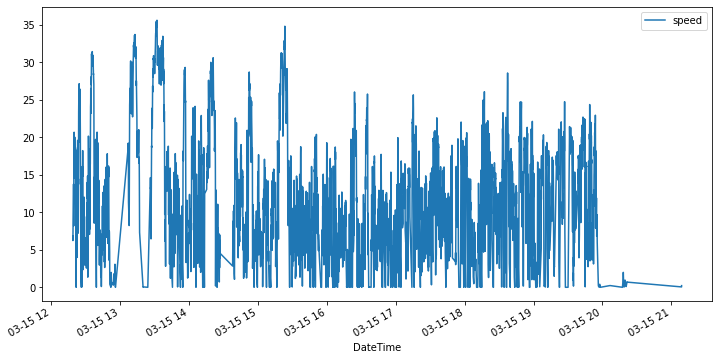

In [24]:
df.plot(x='DateTime', y='speed',figsize=(12,6))

In [25]:
#calculate point to point average speed
#get location
lat_ = df['lat'].tolist()
lon_ = df['lon'].tolist()
#get duration
time_ = df['DateTime'].tolist()
# assume that for first point speed = first instant speed
speed_mean = df['speed'].tolist()
# create time_diff list
time_diffs = df['speed'].tolist()
time_diffs[0] = 0
for i in range(len(speed_mean)):
    if i >0:
        delta_s = haversine(lat_[i], lon_[i], lat_[i-1], lon_[i-1])
        delta_t = (time_[i]-time_[i-1]).total_seconds() #https://www.codegrepper.com/code-examples/python/python+convert+datetime.timedelta+into+seconds
        speed_mean[i] = delta_s/delta_t
        time_diffs[i] = delta_t
df = df.assign(time_diffs = pd.Series(time_diffs))
df = df.assign(speed_mean = pd.Series(speed_mean))
df.head()  


<ipython-input-25-988425bdac6a>:16: RuntimeWarning: invalid value encountered in double_scalars
  speed_mean[i] = delta_s/delta_t
<ipython-input-25-988425bdac6a>:16: RuntimeWarning: divide by zero encountered in double_scalars
  speed_mean[i] = delta_s/delta_t


,driver_id,shift_id,lat,lon,accuracy,speed,heading,activity_type,activity_confidence,DateTime,time_diffs,speed_mean
0,0221203f-75b0-4862-8fbd-3969a0ca7e85,179424.0,40.501158,-80.176138,6.0,6.82,261.09,in_vehicle,100,2019-03-15 12:18:53,0.0,6.820000
1,0221203f-75b0-4862-8fbd-3969a0ca7e85,179424.0,40.501150,-80.176208,6.0,6.23,261.09,in_vehicle,100,2019-03-15 12:18:54,1.0,5.985104
2,0221203f-75b0-4862-8fbd-3969a0ca7e85,179424.0,40.501201,-80.176369,6.0,6.43,262.53,in_vehicle,100,2019-03-15 12:18:56,2.0,7.373415
3,0221203f-75b0-4862-8fbd-3969a0ca7e85,179424.0,40.501362,-80.179117,6.0,12.26,273.42,in_vehicle,100,2019-03-15 12:19:23,27.0,8.630987
4,0221203f-75b0-4862-8fbd-3969a0ca7e85,179424.0,40.501355,-80.179584,6.0,13.15,266.04,in_vehicle,100,2019-03-15 12:19:26,3.0,13.164419


In [26]:
df["speed_mean"].describe()

count    5558.000000
mean             inf
std              NaN
min         0.000000
25%         8.470158
50%        13.552177
75%        19.000809
max              inf
Name: speed_mean, dtype: float64

<AxesSubplot:xlabel='DateTime'>

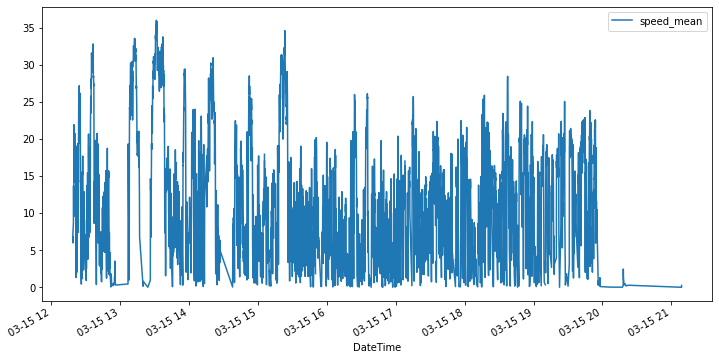

In [27]:
df.plot(x='DateTime', y='speed_mean',figsize=(12,6))

<AxesSubplot:xlabel='speed'>

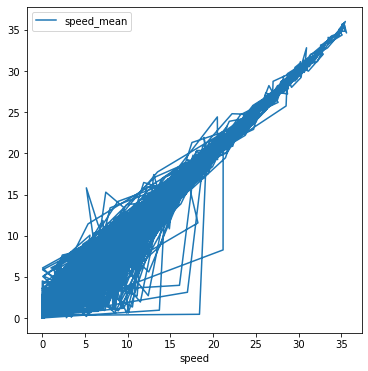

In [28]:
df.plot(x='speed', y='speed_mean',figsize=(6,6))

In [29]:
#1.	Stop_check
threshold_speed = 1 #m/s = 3.6 km/h = 2.3 mi/h
df.loc[df['speed_mean'] <= threshold_speed, 'Stop_check'] = 1 
df.loc[df['speed_mean'] > threshold_speed, 'Stop_check'] = 0

#if on foot
df.loc[df['activity_type'] == "on_foot", 'Stop_check'] = 1
df.loc[df['activity_type'] == "still", 'Stop_check'] = 1
df.head()

,driver_id,shift_id,lat,lon,accuracy,speed,heading,activity_type,activity_confidence,DateTime,time_diffs,speed_mean,Stop_check
0,0221203f-75b0-4862-8fbd-3969a0ca7e85,179424.0,40.501158,-80.176138,6.0,6.82,261.09,in_vehicle,100,2019-03-15 12:18:53,0.0,6.820000,0.0
1,0221203f-75b0-4862-8fbd-3969a0ca7e85,179424.0,40.501150,-80.176208,6.0,6.23,261.09,in_vehicle,100,2019-03-15 12:18:54,1.0,5.985104,0.0
2,0221203f-75b0-4862-8fbd-3969a0ca7e85,179424.0,40.501201,-80.176369,6.0,6.43,262.53,in_vehicle,100,2019-03-15 12:18:56,2.0,7.373415,0.0
3,0221203f-75b0-4862-8fbd-3969a0ca7e85,179424.0,40.501362,-80.179117,6.0,12.26,273.42,in_vehicle,100,2019-03-15 12:19:23,27.0,8.630987,0.0
4,0221203f-75b0-4862-8fbd-3969a0ca7e85,179424.0,40.501355,-80.179584,6.0,13.15,266.04,in_vehicle,100,2019-03-15 12:19:26,3.0,13.164419,0.0


In [30]:
df["Stop_check"].describe()

count    5558.000000
mean        0.038863
std         0.193286
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Stop_check, dtype: float64

In [31]:
#2.	Stop_real
#Get the intersections csv created by QGIS
folder_2 = '0GridwisePGHmap'
filename = "pghpa_intersection_point.csv"
df_node = pd.read_csv(folder_2 + '/' + filename)

Y_node = df_node['Y'].tolist()
X_node = df_node['X'].tolist()

threshold_DIST = 60 # m = 196.85 ft

df.loc[(df['Stop_check']==1), 'Stop_real'] = 1
#for each pair
for n in range(len(df_node)):
    df['DIST_to_X'] = haversine(Y_node[n], X_node[n], df["lat"], df["lon"])
    df.loc[(df['DIST_to_X'] <= threshold_DIST) & (df['Stop_check']==1), 'Stop_real'] = 0
    df = df.drop(columns=['DIST_to_X'])

#Fill blank
df['Stop_real'] = df['Stop_real'].fillna(0)

#Sandwich 1 0 1 problem
points_st = df['Stop_real'].tolist()
time_diffs = df['time_diffs'].tolist()
for i in range(len(points_st)):
    if i>0 and points_st[i] == 0 and points_st[i-1] == 1 and points_st[i+1] == 1 and time_diffs[i] <= 60 :
        points_st[i] = 1
#Sandwich 0 1 0 problem
for i in range(len(points_st)):
    if i>0 and points_st[i] == 1 and points_st[i-1] == 0 and points_st[i+1] == 0 and time_diffs[i] <= 60 :
        points_st[i] = 0
df = df.assign(Stop_real = pd.Series(points_st))
df.head()

,driver_id,shift_id,lat,lon,accuracy,speed,heading,activity_type,activity_confidence,DateTime,time_diffs,speed_mean,Stop_check,Stop_real
0,0221203f-75b0-4862-8fbd-3969a0ca7e85,179424.0,40.501158,-80.176138,6.0,6.82,261.09,in_vehicle,100,2019-03-15 12:18:53,0.0,6.820000,0.0,0.0
1,0221203f-75b0-4862-8fbd-3969a0ca7e85,179424.0,40.501150,-80.176208,6.0,6.23,261.09,in_vehicle,100,2019-03-15 12:18:54,1.0,5.985104,0.0,0.0
2,0221203f-75b0-4862-8fbd-3969a0ca7e85,179424.0,40.501201,-80.176369,6.0,6.43,262.53,in_vehicle,100,2019-03-15 12:18:56,2.0,7.373415,0.0,0.0
3,0221203f-75b0-4862-8fbd-3969a0ca7e85,179424.0,40.501362,-80.179117,6.0,12.26,273.42,in_vehicle,100,2019-03-15 12:19:23,27.0,8.630987,0.0,0.0
4,0221203f-75b0-4862-8fbd-3969a0ca7e85,179424.0,40.501355,-80.179584,6.0,13.15,266.04,in_vehicle,100,2019-03-15 12:19:26,3.0,13.164419,0.0,0.0


In [32]:
df["Stop_real"].describe()

count    5603.000000
mean        0.015170
std         0.122241
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Stop_real, dtype: float64

In [33]:
#3.	O_or_D
# OPTIONS: 1.Origin 2.Destination 3.no
#extract the stop point to list
points_st = df['Stop_real'].tolist()
OorD_list = [''] * len(points_st)

for p in range(len(OorD_list)):
    # 0 --> not_OD
    if points_st[p] == 0:
        OorD_list[p] = "no"
    
    if points_st[p] == 1:
        #assuming that 1st set of stop that is found is origin
        #no any previous stop before this point
        aggregate = 0
        for previous in range(p):
            aggregate = aggregate + points_st[previous]
        if aggregate == 0:
            OorD_list[p] = "Origin"
        
        #when there is consecutive "Orgin" "Destination"
        if p != 0: #not 1st time
            if points_st[p-1] == 1:
                OorD_list[p] = OorD_list[p-1]
            #but in the case that there is a new group of 1 --> zigzag
            if points_st[p-1] == 0:
                #look up back till O D
                check = "no"
                k = 0
                while (check == "no") and (p-k >= 0):
                    k=k+1 
                    check = OorD_list[p-k]
                if check == "Origin":
                    OorD_list[p] = "Destination"
                if check == "Destination":
                    OorD_list[p] = "Origin"

column_series = pd.Series(OorD_list)
df = df.assign(O_or_D = column_series)
df.head()  


,driver_id,shift_id,lat,lon,accuracy,speed,heading,activity_type,activity_confidence,DateTime,time_diffs,speed_mean,Stop_check,Stop_real,O_or_D
0,0221203f-75b0-4862-8fbd-3969a0ca7e85,179424.0,40.501158,-80.176138,6.0,6.82,261.09,in_vehicle,100,2019-03-15 12:18:53,0.0,6.820000,0.0,0.0,no
1,0221203f-75b0-4862-8fbd-3969a0ca7e85,179424.0,40.501150,-80.176208,6.0,6.23,261.09,in_vehicle,100,2019-03-15 12:18:54,1.0,5.985104,0.0,0.0,no
2,0221203f-75b0-4862-8fbd-3969a0ca7e85,179424.0,40.501201,-80.176369,6.0,6.43,262.53,in_vehicle,100,2019-03-15 12:18:56,2.0,7.373415,0.0,0.0,no
3,0221203f-75b0-4862-8fbd-3969a0ca7e85,179424.0,40.501362,-80.179117,6.0,12.26,273.42,in_vehicle,100,2019-03-15 12:19:23,27.0,8.630987,0.0,0.0,no
4,0221203f-75b0-4862-8fbd-3969a0ca7e85,179424.0,40.501355,-80.179584,6.0,13.15,266.04,in_vehicle,100,2019-03-15 12:19:26,3.0,13.164419,0.0,0.0,no


In [34]:
df["O_or_D"].describe()

count     5603
unique       3
top         no
freq      5518
Name: O_or_D, dtype: object

In [35]:
OorD_list

['no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',

In [36]:
# To Create Directory If Not Exist
# https://appdividend.com/2021/07/03/how-to-create-directory-if-not-exist-in-python/
folder_3 = folder_1+"_cal"
path = folder_3
if not os.path.exists(path):
    os.makedirs(path, exist_ok=False)
# datetime object containing current date and time
now = datetime.now()
dt_string = now.strftime("%Y%m%d_%H%M%S")
#export
df.to_csv(path+ "/" + example_person + dt_string + ".csv",index = 0)